<a href="https://colab.research.google.com/github/ak4721269/Hourly-rates-prediction-system/blob/main/Data_generation_and_eda_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define constants
locations = [
    ("Dallas", "Texas"), ("Atlanta", "Georgia"), ("New York", "New York"),
    ("Philadelphia", "Pennsylvania"), ("Washington", "D.C."),
    ("San Francisco", "California"), ("Los Angeles", "California"),
    ("Seattle", "Washington"), ("Chicago", "Illinois"),
    ("San Diego", "California"), ("Miami", "Florida"),
    ("Boston", "Massachusetts"), ("Detroit", "Michigan"),
    ("Phoenix", "Arizona"), ("Houston", "Texas")
]

job_titles = [
    "Registered Nurse_ICU", "Registered Nurse_MedSurg", "Registered Nurse_Telemetry",
    "Registered Nurse_Oncology", "Registered Nurse_Pediatric", "Physio Therapist",
    "Lab Technician", "Registered Nurse_CriticalCare", "Registered Nurse_Cardiology",
    "Registered Nurse_Surgery"
]

hospital_suffixes = ["Corporate", "NonProfit", "Community", "Veterans", "Govt"]

# Seasonal uptick multiplier
def seasonal_rate(base_rate, start_date):
    flu_season = [10, 11, 12, 1, 2]  # October to February
    if start_date.month in flu_season:
        return base_rate * random.uniform(1.1, 1.3)
    elif start_date.month in [12]:  # December holidays
        return base_rate * random.uniform(1.2, 1.5)
    return base_rate

# Generate data
def generate_data_row():
    city, state = random.choice(locations)
    hospital_name = f"{city} {random.choice(hospital_suffixes)}"
    job_title = random.choice(job_titles)

    # Generate random contract dates within 2023-2024
    start_date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 729))
    end_date = start_date + timedelta(weeks=random.randint(4, 13))

    # Base pay rates by job type
    base_rate = random.uniform(35, 75) if "Registered Nurse" in job_title else random.uniform(25, 50)
    hourly_rate = round(seasonal_rate(base_rate, start_date), 2)

    return {
        "Job Title": job_title,
        "Location": f"{city}, {state}",
        "Hospital Name": hospital_name,
        "Contract Start Date": start_date.strftime('%Y-%m-%d'),
        "Contract End Date": end_date.strftime('%Y-%m-%d'),
        "Hourly Pay Rate": hourly_rate
    }

# Generate large dataset
def generate_dataset(rows=250000):
    data = [generate_data_row() for _ in range(rows)]
    return pd.DataFrame(data)

# Create and save the dataset
data = generate_dataset(250000)
data.to_csv("nurse_hourly_pay_rates.csv", index=False)

print("Dataset generated and saved as 'nurse_hourly_pay_rates.csv'")


Dataset generated and saved as 'nurse_hourly_pay_rates.csv'


# **Exploratory Data analysis**

**a.Variations of the hourly pay rates across the major metros**
To analyze the variations in hourly pay rates across different metropolitan areas, we can group the data by location and calculate the average hourly pay rate. This can be visualized using a bar chart.

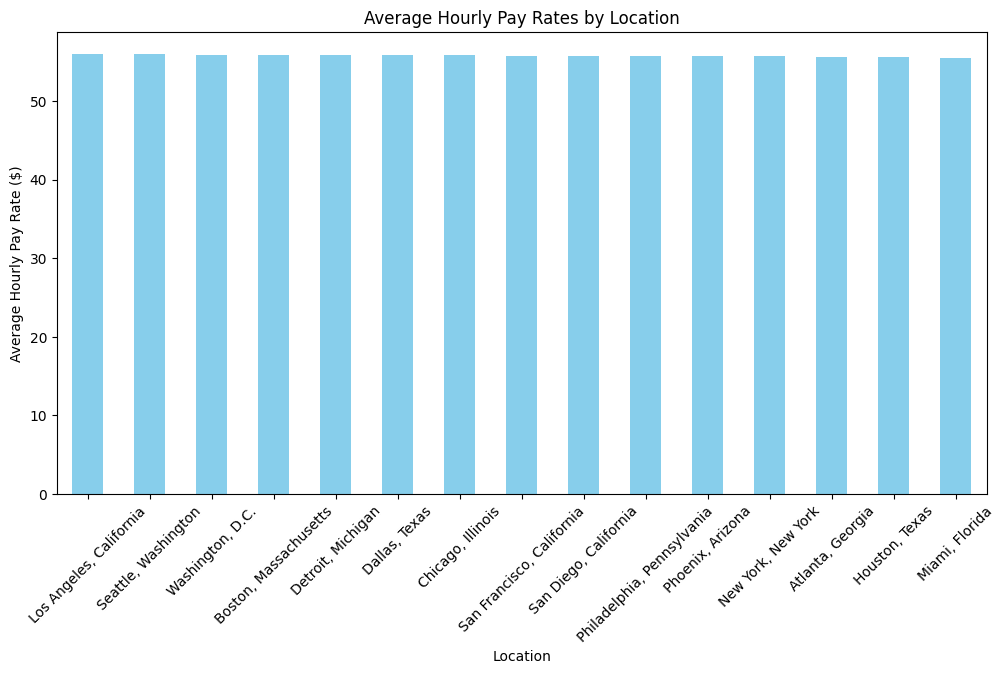

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("nurse_hourly_pay_rates.csv")

# Group by location and calculate average hourly pay rate
avg_pay_by_location = data.groupby('Location')['Hourly Pay Rate'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_pay_by_location.plot(kind='bar', color='skyblue')
plt.title('Average Hourly Pay Rates by Location')
plt.xlabel('Location')
plt.ylabel('Average Hourly Pay Rate ($)')
plt.xticks(rotation=45)
plt.show()

**b.Uptick in Pay Rates During Flu & Holiday Season**

To show the uptick in pay rates during the flu season and holiday season, we can create a new column to categorize the dates and then compare the average pay rates.

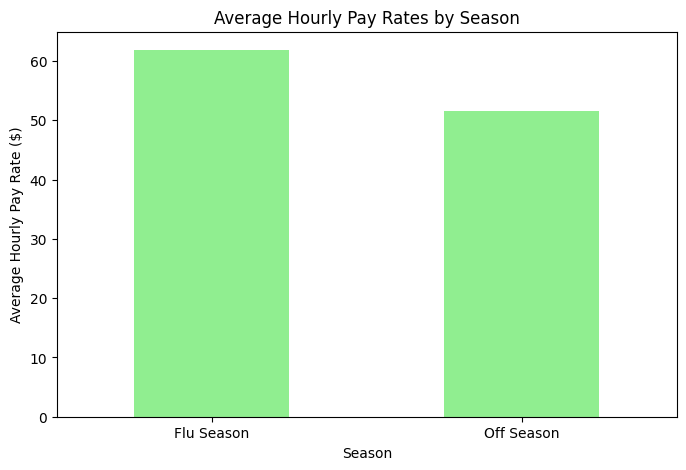

In [ ]:
# Function to categorize seasons
def categorize_season(row):
    month = pd.to_datetime(row['Contract Start Date']).month
    if month in [10, 11, 12, 1, 2]:
        return 'Flu Season'
    elif month == 12:
        return 'Holiday Season'
    else:
        return 'Off Season'

data['Season'] = data.apply(categorize_season, axis=1)

# Calculate average pay rate by season
avg_pay_by_season = data.groupby('Season')['Hourly Pay Rate'].mean()

# Plotting
plt.figure(figsize=(8, 5))
avg_pay_by_season.plot(kind='bar', color='lightgreen')
plt.title('Average Hourly Pay Rates by Season')
plt.xlabel('Season')
plt.ylabel('Average Hourly Pay Rate ($)')
plt.xticks(rotation=0)
plt.show()

**c.Hourly Pay Rates Against City Desirability**

To analyze hourly pay rates against city desirability, we would need additional data on cost of living, schools, crime rates, and public transport. Assuming we have this data in a DataFrame called city_desirability, we can merge it with our dataset and visualize the relationship.

In [ ]:
import pandas as pd
import numpy as np

# Load the previously created dataset
data = pd.read_csv("nurse_hourly_pay_rates.csv")

# Compute average hourly pay rate per location
avg_pay_rate = data.groupby('Location')['Hourly Pay Rate'].mean().reset_index()
avg_pay_rate.columns = ['Location', 'Average Hourly Pay Rate']

# Create the city desirability DataFrame with hypothetical values
city_desirability = pd.DataFrame({
    'Location': avg_pay_rate['Location'],
    'Cost of Living': np.random.randint(60, 100, size=len(avg_pay_rate)),  # Random values between 60 and 100
    'School Quality': np.random.randint(1, 10, size=len(avg_pay_rate)),  # Random quality rating from 1 to 10
    'Crime Rate': np.random.randint(1, 10, size=len(avg_pay_rate)),  # Random crime rating from 1 to 10
    'Public Transport': np.random.randint(1, 10, size=len(avg_pay_rate)),  # Random transport rating from 1 to 10
})

# Merge average pay rate with city desirability
city_desirability = city_desirability.merge(avg_pay_rate, on='Location')

# Display the resulting DataFrame
print(city_desirability)

                      Location  Cost of Living  School Quality  Crime Rate  \
0             Atlanta, Georgia              90               5           4   
1        Boston, Massachusetts              84               1           8   
2            Chicago, Illinois              95               6           2   
3                Dallas, Texas              89               5           3   
4            Detroit, Michigan              97               5           8   
5               Houston, Texas              79               3           2   
6      Los Angeles, California              64               6           4   
7               Miami, Florida              62               2           4   
8           New York, New York              86               6           5   
9   Philadelphia, Pennsylvania              71               2           3   
10            Phoenix, Arizona              63               9           4   
11       San Diego, California              82               6  

**d.Specialization Pay Rates Comparison**

To compare pay rates for specializations like oncology, cardiology, and surgery against other job titles, we can filter the dataset and visualize the differences.

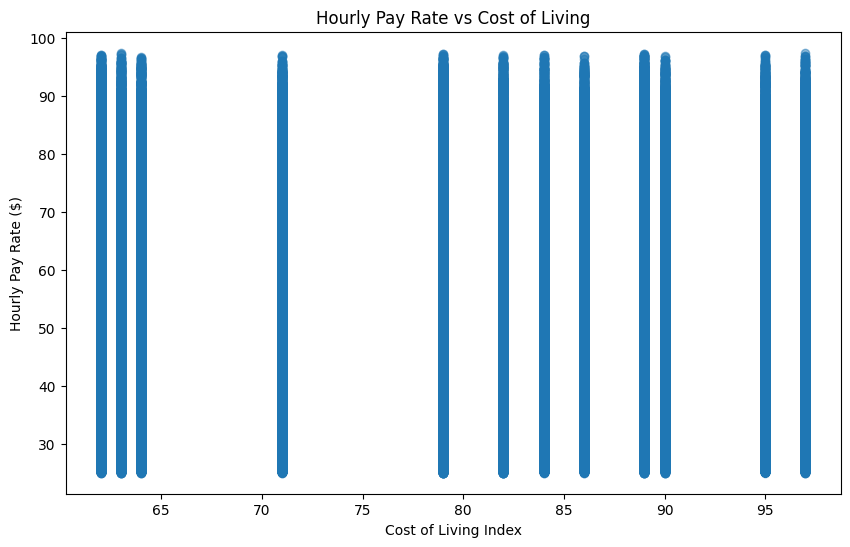

In [ ]:
# Assuming city_desirability is a DataFrame with columns ['Location', 'Cost of Living', 'School Quality', 'Crime Rate', 'Public Transport']
# Merge datasets
merged_data = pd.merge(data, city_desirability, on='Location')

# Plotting Hourly Pay Rate vs Cost of Living
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Cost of Living'], merged_data['Hourly Pay Rate'], alpha=0.5)
plt.title('Hourly Pay Rate vs Cost of Living')
plt.xlabel('Cost of Living Index')
plt.ylabel('Hourly Pay Rate ($)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("nurse_hourly_pay_rates.csv")

# Prepare the features and target variable
# For simplicity, let's assume we are using Job Title, Location, and Hospital Name as features
X = data[['Job Title', 'Location', 'Hospital Name']]
y = data['Hourly Pay Rate']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





**Random Forest Model Implementation**

In [ ]:

import joblib



# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the trained model to a file
joblib.dump(model, 'random_forest_regressor.pkl')

print("Model trained and saved as 'random_forest_regressor.pkl'")

Mean Squared Error: 170.93134174374947
Model trained and saved as 'random_forest_regressor.pkl'



A. Handling High Cardinality

High cardinality in categorical features (like hospitals) can lead to several issues in machine learning models, such as increased computation time, overfitting, and reduced model interpretability. Here are a few methods for handling high cardinality:

One-Hot Encoding:

Pros: Simple to implement; retains all unique categories.

Cons: Increases feature space significantly, leading to a sparse matrix that can affect model performance.

Label Encoding:

Pros: Reduces feature space; simple to implement.

Cons: Implies an ordinal relationship that may not exist, potentially misleading the model.

B. Metrics for Measuring Model Accuracy
Mean Squared Error (MSE):

Measures the average of the squares of the errors (difference between predicted and actual values).

Justification: Since it is Sensitive to outliers; gives a good indication of model performance.


In [ ]:
!pip install streamlit

# **Stacked LSTM model Implementation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from keras import Sequential
from keras._tf_keras.keras.preprocessing import sequence
from keras.src.layers import Embedding, LSTM, Dense, Dropout
from keras.src.metrics.metrics_utils import confusion_matrix
from keras.src.utils import to_categorical

# from keras.models import Sequential,Model

# Load the dataset
data = pd.read_csv("nurse_hourly_pay_rates.csv")

# Convert Contract Start Date to datetime
data['Contract Start Date'] = pd.to_datetime(data['Contract Start Date'])

# Aggregate the data by date and average the hourly rate
daily_data = data.groupby('Contract Start Date')['Hourly Pay Rate'].mean().reset_index()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['Hourly Pay Rate'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Stacked LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = np.mean((y_pred_inverse - y_test_inverse) ** 2)
print(f"Mean Squared Error: {mse:.2f}")
# fig = model.plot(forecast)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1268
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0205
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0203
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123
Epoch 16/50
18/18 ━━━━━━━━━━

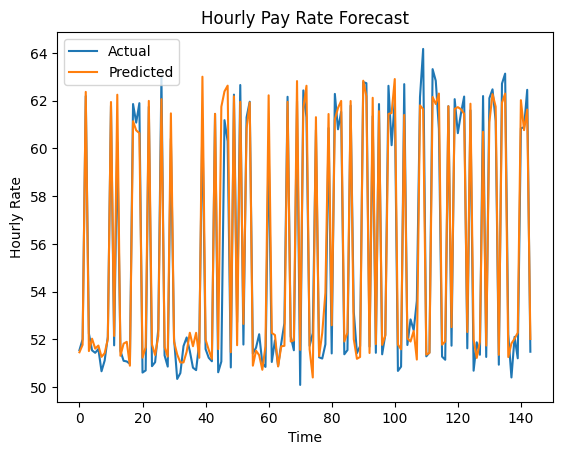

In [ ]:
   import matplotlib.pyplot as plt
   plt.plot(y_test_inverse, label='Actual')  # Actual values
   plt.plot(y_pred_inverse, label='Predicted') # Predicted values
   plt.legend()
   plt.title('Hourly Pay Rate Forecast')
   plt.xlabel('Time')
   plt.ylabel('Hourly Rate')
   plt.show()

In [ ]:
import joblib

# Save the model
model.save('stacked_lstm_model.keras')

In [ ]:
!pip install streamlit

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming 'data' is your DataFrame containing the hourly pay rates
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Hourly Pay Rate'].values.reshape(-1, 1))

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the dataset
data = pd.read_csv("nurse_hourly_pay_rates.csv")

# Convert Contract Start Date to datetime
data['Contract Start Date'] = pd.to_datetime(data['Contract Start Date'])

# Aggregate the data by date and average the hourly rate
daily_data = data.groupby('Contract Start Date')['Hourly Pay Rate'].mean().reset_index()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['Hourly Pay Rate'].values.reshape(-1, 1))

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

# Load the trained LSTM model
lstm_model = tf.keras.models.load_model('stacked_lstm_model.keras')

# Load the trained Random Forest Regressor model
rf_model = joblib.load('random_forest_regressor.pkl')

# Load the scaler used for normalization
scaler = joblib.load('scaler.pkl')  # Ensure you have saved the scaler after training

# Load the original training data to fit the encoder
# This should be the same data used to train both models
original_training_data = pd.read_csv('/content/nurse_hourly_pay_rates.csv')  # Replace with your actual data source

# Fit the OneHotEncoder on the original training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(original_training_data[['Job Title', 'Location', 'Hospital Name']])

# Streamlit app title
st.title("Hourly Rate Prediction for Nurses")

# User inputs
job_title = st.text_input("Job Title")
location = st.text_input("Location")
hospital = st.text_input("Hospital")
contract_start_date = st.date_input("Contract Start Date", value=datetime.today())
contract_end_date = st.date_input("Contract End Date", value=datetime.today())

# Function to prepare input for LSTM prediction
def prepare_lstm_input(job_title, location, hospital, start_date, end_date):
    # Create a dummy input for LSTM
    dummy_sequence = np.zeros((10, 1))  # Create a dummy sequence of zeros
    input_scaled = scaler.transform(dummy_sequence)  # Scale the input
    input_scaled = input_scaled.reshape((1, 10, 1))  # Reshape for LSTM
    return input_scaled

# Function to prepare input for Random Forest prediction
def prepare_rf_input(job_title, location, hospital, start_date, end_date):
    # Create a DataFrame for input
     input_data = pd.DataFrame({
        'Job Title': [job_title],
        'Location': [location],
        'Hospital Name': [hospital]
      })
     training_features = rf_model.feature_names_in_  # Assumes you used 'rf_model.fit(X_train, y_train)'
     input_encoded = pd.get_dummies(input_data, columns=['Job Title', 'Location', 'Hospital Name'],
                                    drop_first=True)  # Align with training preprocessing

    # Align features: Add missing columns, remove extra columns
     missing_cols = set(training_features) - set(input_encoded.columns)
     for col in missing_cols:
        input_encoded[col] = 0  # Add missing columns with 0 values

     extra_cols = set(input_encoded.columns) - set(training_features)
     input_encoded = input_encoded.drop(columns=extra_cols)  # Remove extra columns

     input_encoded = input_encoded[training_features]  # Ensure correct order of features

     return input_encoded

# Prediction button
if st.button("Predict Hourly Rate"):
    # Prepare the input for LSTM
    lstm_input_data = prepare_lstm_input(job_title, location, hospital, contract_start_date, contract_end_date)

    # Make prediction using LSTM
    lstm_predicted_rate = lstm_model.predict(lstm_input_data)
    lstm_predicted_rate_inverse = scaler.inverse_transform(lstm_predicted_rate)

    # Prepare the input for Random Forest
    rf_input_data = prepare_rf_input(job_title, location, hospital, contract_start_date, contract_end_date)

    # Make prediction using Random Forest
    rf_predicted_rate = rf_model.predict(rf_input_data)

    # Display the results
    st.success(f"The predicted hourly rate using Random Forest Regressor is: ${rf_predicted_rate[0]:.2f}")
    st.success(f"The predicted hourly rate using Stacked LSTM is: ${lstm_predicted_rate[0][0]:.2f}")

Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.132.113:8501

⠴⠦your url is: https://hot-radios-fix.loca.lt
2024-12-04 17:17:48.344321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 17:17:48.375084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 17:17:48.384170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 17:17:48.406031: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU 

In [ ]:
from tensorflow.keras.models import load_model

try:
    model = load_model('stacked_lstm_model.h5')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully!


In [ ]:
import tensorflow as tf

# Load the trained Stacked LSTM model
model = tf.keras.models.load_model('stacked_lstm_model.keras')

# Display the model summary
model.summary()

# Check the input shape of the model
input_shape = model.input_shape
print(f"Input shape: {input_shape}")

# Check the output shape of the model
output_shape = model.output_shape
print(f"Output shape: {output_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403,404 (1.54 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,703 (787.91 KB)

Input shape: (None, 10, 1)
Output shape: (None, 1)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1
